In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

In [97]:
california = fetch_california_housing()

In [98]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [99]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [100]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [101]:
print(california.target_names)

['MedHouseVal']


In [102]:
df = pd.DataFrame(california.data, columns = california.feature_names)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [103]:
df['MedHouseVal'] = california.target

In [104]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [106]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

<Axes: >

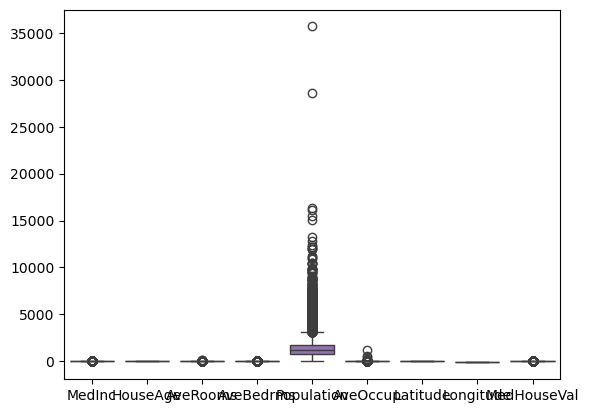

In [107]:
sns.boxplot(df, gap = 2)

In [108]:
## Code to remove outliers 

def Remove_out(dft, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    Lower_fence = Q1 - 1.5*IQR
    Higher_fence = Q3 + 1.5*IQR
    return df[(df[col] >= Lower_fence) & (df[col] <= Higher_fence)]

for i in df.select_dtypes(include = ['int32', 'float64']):
    df = Remove_out(df,i)

df
    
    

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
...,...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<Axes: >

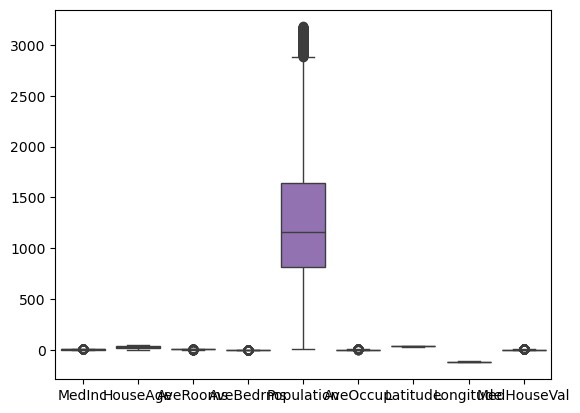

In [114]:
sns.boxplot(df)

In [110]:
## Since the data is clear now creating model for this

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X,y

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 5      4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
 6      3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
 7      3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20634  3.7125      28.0  6.779070   1.148256      1041.0  3.026163     39.27   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude  
 3    

In [156]:
# dividing into train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12985, 8), (3247, 8), (12985,), (3247,))

In [151]:
## Standarize the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'After scaling')

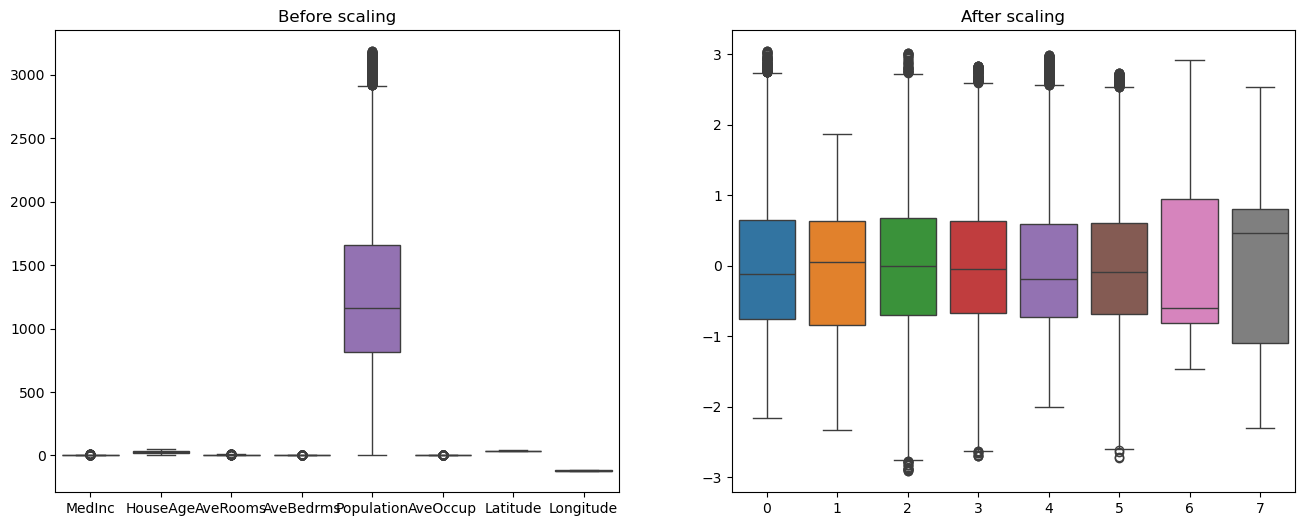

In [145]:
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title('Before scaling')

plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title('After scaling')



In [146]:
## creating model

from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train,y_train)

LinearRegression()

In [163]:
y_pred = LR.predict(X_test)
y_pred.shape

(3247,)

In [164]:
## Acuracy of the model

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print("Accuracy :", r2 )

Accuracy : 0.6241786277437562


C:\Users\bhard\AppData\Local\Temp\ipykernel_11784\2675331329.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,kde = True)


<Axes: xlabel='MedHouseVal', ylabel='Density'>

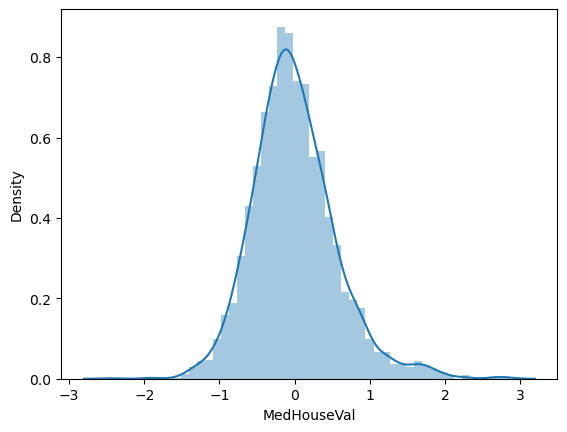

In [167]:
residual = y_test - y_pred
sns.distplot(residual,kde = True)

In [174]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

model = Lasso()

model.fit(X_train,y_train)
print("prediction :",model.predict(X_test))

mae = mean_absolute_error(y_test,model.predict(X_test))
mse = mean_squared_error(y_test,model.predict(X_test))
rmse = root_mean_squared_error(y_test,model.predict(X_test))
r2 = r2_score(y_test,model.predict(X_test))

print("mean_absolute_error :", mae)
print("mean_squared_error :", mse)
print("root_ mean_squared_error :", rmse)
print("R2 :", r2)


prediction : [1.91915247 1.91598977 1.91300279 ... 1.91153125 1.9094778  1.91888494]
mean_absolute_error : 0.7421019565594966
mean_squared_error : 0.8369847600670542
root_ mean_squared_error : 0.9148687119292331
R2 : 0.00037915238440355825


In [173]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

model = Ridge()

model.fit(X_train,y_train)
print("prediction :",model.predict(X_test))

mae = mean_absolute_error(y_test,model.predict(X_test))
mse = mean_squared_error(y_test,model.predict(X_test))
rmse = root_mean_squared_error(y_test,model.predict(X_test))
r2 = r2_score(y_test,model.predict(X_test))

print("mean_absolute_error :", mae)
print("mean_squared_error :", mse)
print("root_ mean_squared_error :", rmse)
print("R2", r2)

prediction : [1.49563547 0.94746973 2.94683375 ... 1.30605606 2.14878496 1.88349575]
mean_absolute_error : 0.4246003981744837
mean_squared_error : 0.3146693741865765
root_ mean_squared_error : 0.5609539858014885
R2 0.6241866261485394


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

model = E

model.fit(X_train_scaled,y_train)
print("prediction :",model.predict(X_test))

mae = mean_absolute_error(y_test,model.predict(X_test))
mse = mean_squared_error(y_test,model.predict(X_test))
rmse = root_mean_squared_error(y_test,model.predict(X_test))
r2 = r2_score(y_test,model.predict(X_test))

print("mean_absolute_error :", mae)
print("mean_squared_error :", mse)
print("root_ mean_squared_error :", rmse)
print("R2", r2)